# Perceptron_trick in logistic regression

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

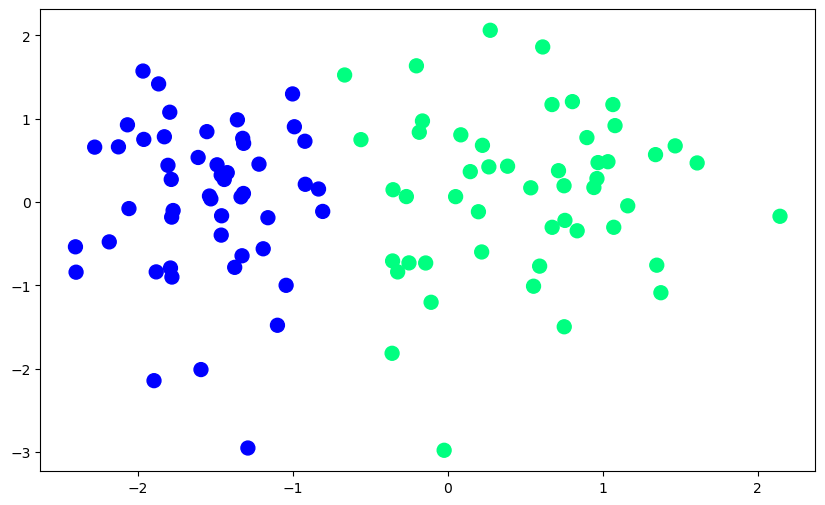

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Using Step function

In [11]:
def perceptron(X,y):
    
    X=np.insert(X,0,1,axis=1)
    weight=np.ones(X.shape[1])
    
    lr=0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weight))
        weight=weight + lr*(y[j]-y_hat)*X[j]
    return weight[0],weight[1:]

In [12]:
def step(z):
    return 1 if z>0 else 0

In [16]:
intercept_,coef_=perceptron(X,y)

In [17]:
print(intercept_)
print(coef_)

0.9
[1.32426426 0.11124809]


In [18]:
m=-(coef_[0]/coef_[1])
c=-(intercept_/coef_[1])

In [24]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input + c

(-3.0, 2.0)

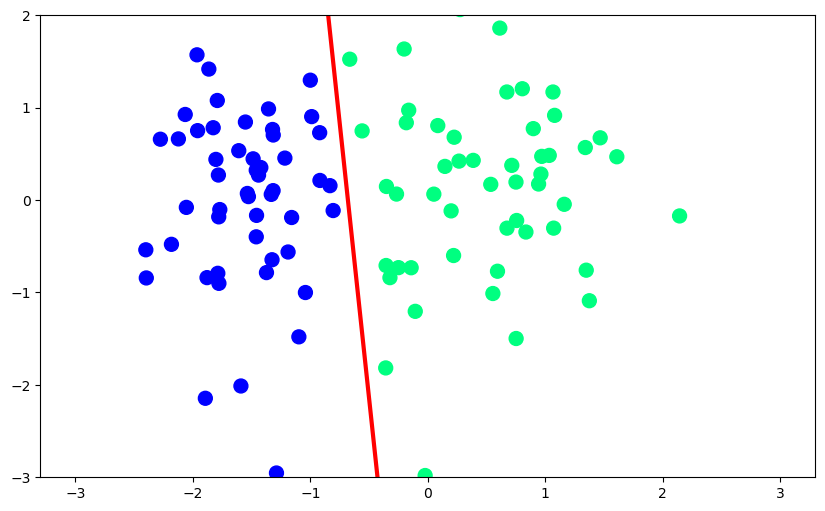

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lor=LogisticRegression()

In [29]:
lor.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
lor.coef_,lor.intercept_

(array([[3.50144121, 0.02773483]]), array([2.25106636]))

In [32]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
c=-(lor.intercept_[0]/lor.coef_[0][1])

In [33]:
y_out=m*x_input + c

(-3.0, 2.0)

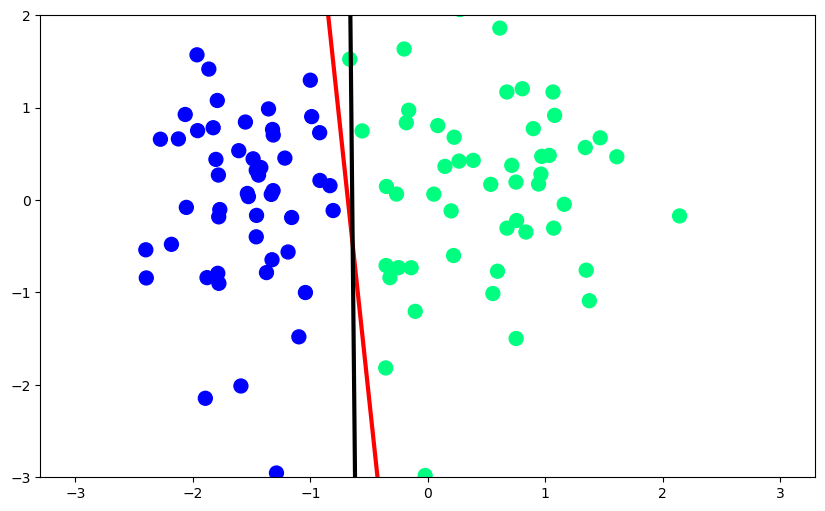

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input,y_out,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using Sigmoid function

In [37]:
def perceptron(X,y):
    
    X=np.insert(X,0,1,axis=1)
    weight=np.ones(X.shape[1])
    
    lr=0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X[j],weight))
        weight=weight + lr*(y[j]-y_hat)*X[j]
    return weight[0],weight[1:]

In [38]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [39]:
intercept_,coef_=perceptron(X,y)

In [43]:
m=-(coef_[0]/coef_[1])
c=-(intercept_/coef_[1])

In [44]:
y_out_sig=m*x_input+c

(-3.0, 2.0)

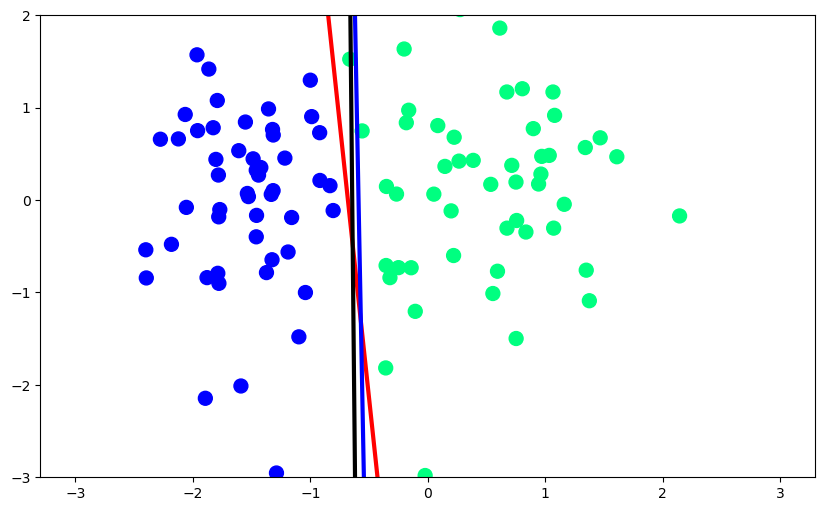

In [45]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input,y_out,color='black',linewidth=3)
plt.plot(x_input,y_out_sig,color='blue',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using gredient descent

In [57]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [58]:
coef_,intercept_=gd(X,y)

In [59]:
m=-(coef_[0]/coef_[1])
c=-(intercept_/coef_[1])

In [60]:
y_out_gd=m*x_input+c

(-3.0, 2.0)

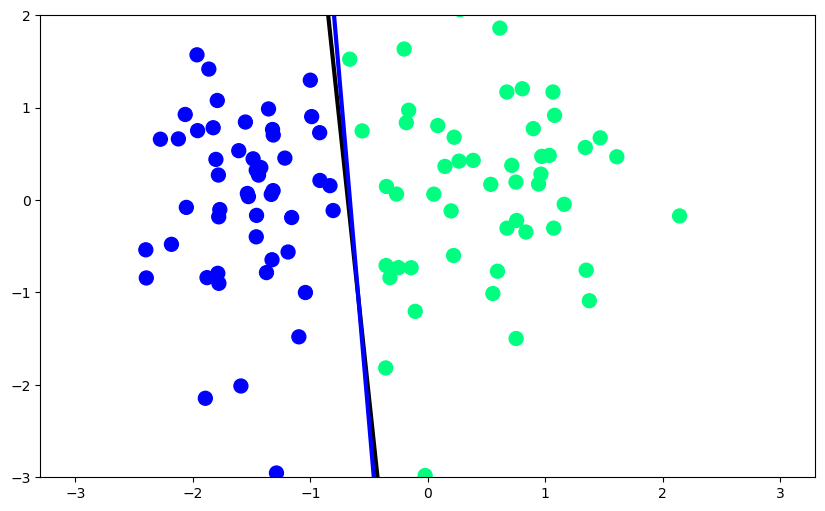

In [62]:
plt.figure(figsize=(10,6))

plt.plot(x_input,y_input,color='black',linewidth=3)
plt.plot(x_input,y_out_gd,color='blue',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Classification Metrics

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [69]:
lor=LogisticRegression()

In [70]:
lor.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [71]:
y_pred=lor.predict(X)

In [74]:
print("Accuracy:",accuracy_score(y_pred,y))
print("Precision Score:",precision_score(y_pred,y))
print("Recall Score:",recall_score(y_pred,y))
print("F1 Score:",f1_score(y_pred,y))
print("Confusion Matrix:",confusion_matrix(y_pred,y))


Accuracy: 0.99
Precision Score: 0.98
Recall Score: 1.0
F1 Score: 0.98989898989899
Confusion Matrix: [[50  1]
 [ 0 49]]


In [75]:
print("Classification Report:")
print(classification_report(y_pred,y))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.98      1.00      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

